In [1]:
# XGBoost, 앙상블(여러모델 사용)
# SVM 평면상의 벡터, 독립변수를 좌표로 표시
# 2차원으로 만들어 논리적으로 표시
# kaggle -> 종료된 대회 제줄하면 채점해주기도 함
# 텐서플로우, 파이토치(딥러닝, 알고리즘 조합) 예정

In [2]:
# titanic 데이터 불러오기
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
# 옵션 조정
pd.options.display.max_columns = None
pd.options.display.max_rows = None # 제한없이 보이기

In [3]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
temp = titanic.isna().sum()
# remove_cols = temp[temp > 100].index + ['embark_town']
remove_cols = ['deck', 'embark_town']
titanic = titanic.drop(remove_cols,axis=1)
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male alive  alone  
0    man        True    no  False  
1  woman       False   yes  False  
2  woman       False   yes   True  
3  woman       False   yes  False  
4    man        True    no   True

In [5]:
titanic.info()
titanic.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         714 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [6]:
# age na drop, embarked : 최빈값으로 대체
titanic = titanic.dropna(subset=['age'])

In [7]:
freq_value = titanic['embarked'].value_counts().idxmax() # 인덱스 max
# titanic.mode()
titanic['embarked'] = titanic['embarked'].fillna(freq_value)

In [8]:
titanic.isna().sum()
cols = list(titanic.columns[:6]) + ['embarked']
# 범주형 - label, onehot(희소행렬)
onehot_gender = pd.get_dummies(titanic['sex'], prefix='gender')
onehot_embarked = pd.get_dummies(titanic['embarked'], prefix='embarked')
titanic2 = pd.concat([titanic.loc[:,cols], onehot_gender, onehot_embarked], axis=1)
# onehot으로 변경된 범주형 변수는 삭제한다.
titanic2 = titanic2.drop(['sex','embarked'],axis=1)
titanic2.head()

survived  pclass   age  sibsp  parch  gender_female  gender_male  \
0         0       3  22.0      1      0          False         True   
1         1       1  38.0      1      0           True        False   
2         1       3  26.0      0      0           True        False   
3         1       1  35.0      1      0           True        False   
4         0       3  35.0      0      0          False         True   

   embarked_C  embarked_Q  embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True

In [9]:
# 독립변수, 종속변수 x,y
X = titanic2.drop('survived', axis=1)
y = titanic2['survived']

In [10]:
# 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(X)

In [11]:
# 학습용과 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,stratify=y,random_state=42)

In [12]:
from sklearn import svm

In [13]:
# 학습
model = svm.SVC()
model.fit(x_train,y_train)

SVC()

In [14]:
# 평가
from sklearn.metrics import classification_report
preds = model.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       106
           1       0.81      0.64      0.72        73

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



In [15]:
# 프로젝트 주제
# 가입고객 이탈 예측하기
# 활동량, 부정적 단어

In [16]:
# 지도학습
# KNN(분류, 회귀), 선형회귀(회귀), 비선형회귀(회귀), 로지스틱 회귀(분류), SVM(분류, 회귀)

In [17]:
# 유방암 검진(유무)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.feature_names
cancer.target
cancer.data
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(cancer.target_names)

['malignant' 'benign']


In [18]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  target  
0                  0.11890       0  
1                  0.08902       0  
2                  0.08758       0  
3                  0.17300       0  
4                  0.07678       0

In [19]:
df.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  radius error  texture error  \
count     569.000000              569.000000    569.000000     569.000000   
mean        0.181162                0.062798      0.405172       1.216853   
std         0.027414                0.007060      0.277313       0.551648   
min         0.106000                0.049960      0.111500       0.360200   
25%         0.161900                0.057700      0.232400       0.833900   
50%         0.179200                0.061540      0.324200       1.108000   
75%         0.195700                0.066120      0.478900       1.474000   
max         0.304000                0.097440      2.873000       4.885000   

       perimeter error  area error  smoothness error  compactness error  \
count       569.000000  569.000000        569.000000         569.000000   
mean          2.866059   40.337079          0.007041           0.025478   
std           2.021855   45.491006          0.003003           0.017908   
min           0.757000    6.802000          0.001713           0.002252   
25%           1.606000   17.850000          0.005169           0.013080   
50%           2.287000   24.530000          0.006380           0.020450   
75%           3.357000   45.190000          0.008146           0.032450   
max          21.980000  542.200000          0.031130           0.135400   

       concavity error  concave points error  symmetry error  \
count       569.000000            569.000000      569.000000   
mean          0.031894              0.011796        0.020542   
std           0.030186              0.006170        0.008266   
min           0.000000              0.000000        0.007882   
25%           0.015090              0.007638        0.015160   
50%           0.025890              0.010930        0.018730   
75%           0.042050              0.014710        0.023480   
max           0.396000              0.052790        0.078950   

       fractal dimension error  worst radius  worst texture  worst perimeter  \
count               569.000000    569.000000     569.000000       569.000000   
mean                  0.003795     16.269190      25.677223       107.261213   
std                   0.002646      4.833242       6.146258        33.602542   
min                   0.000895      7.930000      12.020000        50.410000   
25%                   0.002248     13.010000      21.080000        84.110000   
50%                   0.003187     14.970000      25.410000        97.660000   
75%                   0.004558     18.790000      29.720000       125.400000   
max                   0.029840     36.040000      49.540000       251.200000   

        worst area  wor

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [21]:
temp = df.isna().sum()
temp[temp > 0]

Series([], dtype: int64)

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

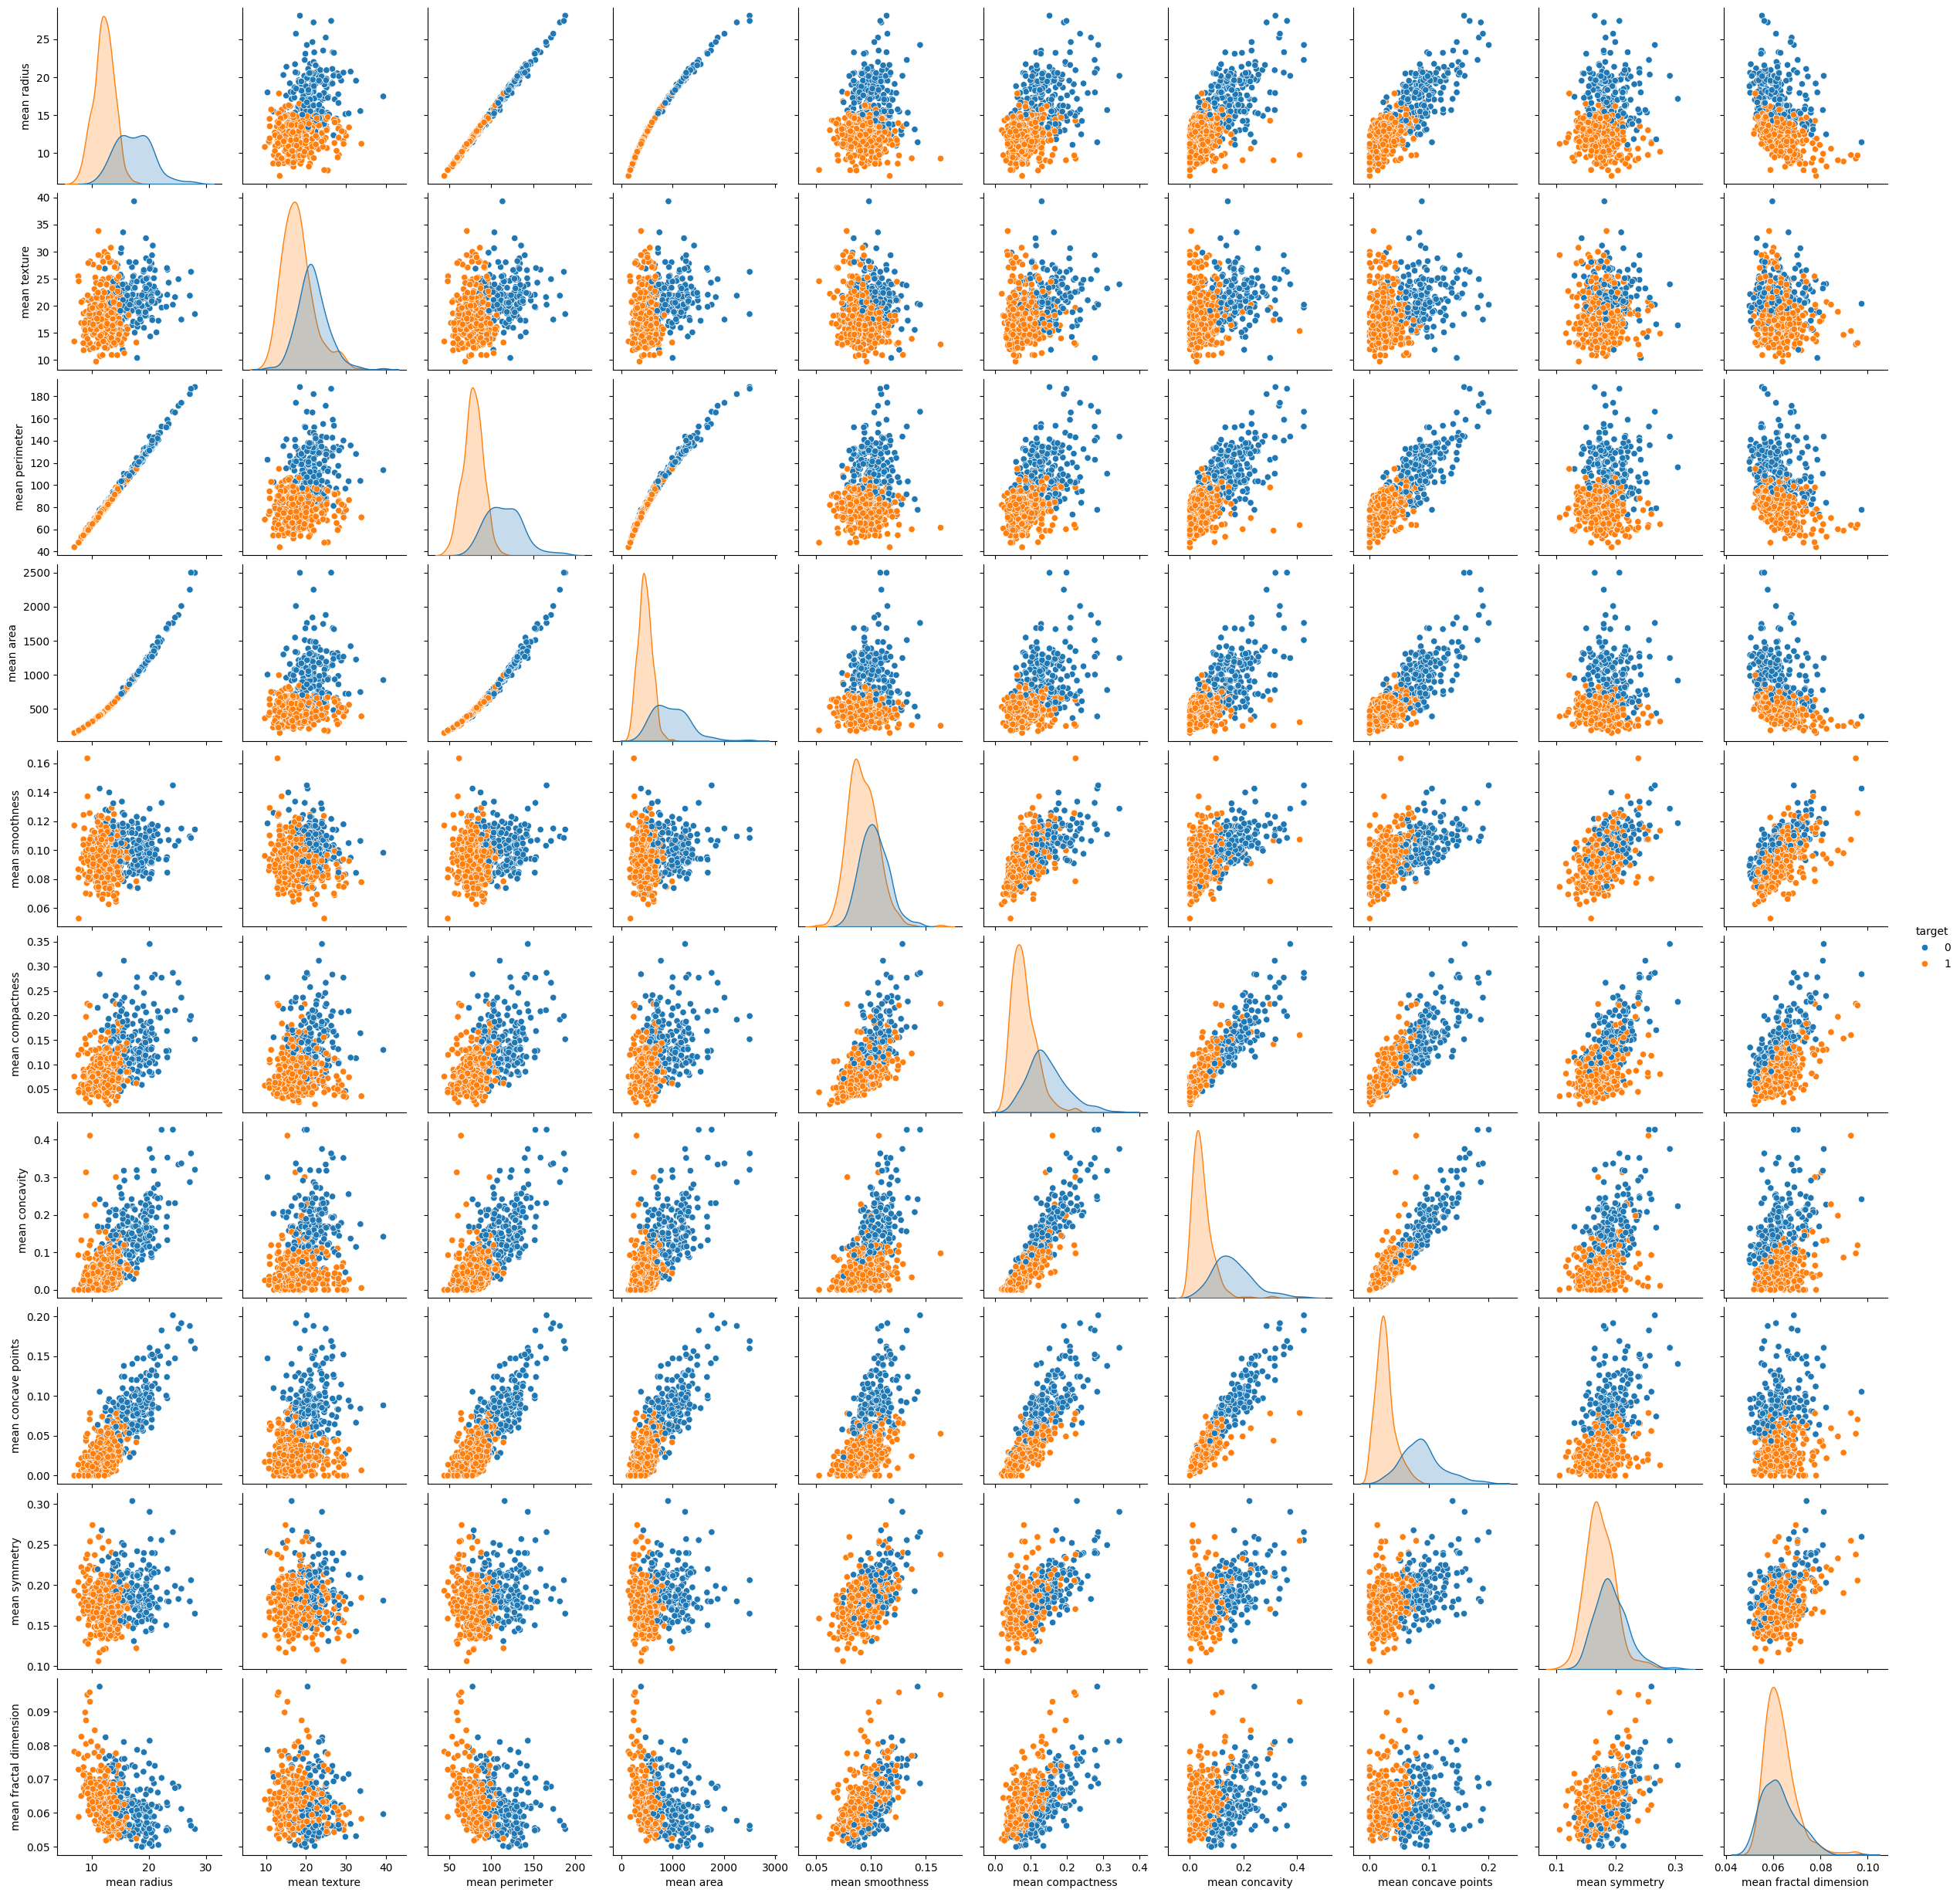

In [23]:
# 변수들 간의 산점도
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension'])

<Axes: xlabel='mean area', ylabel='mean smoothness'>

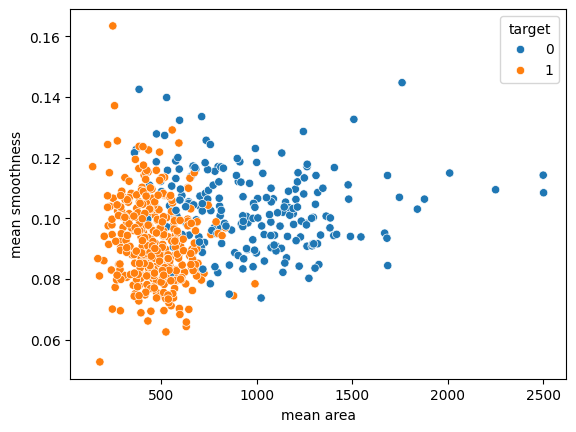

In [24]:
sns.scatterplot(data=df, x='mean area',y='mean smoothness',hue='target')

<Axes: xlabel='target', ylabel='count'>

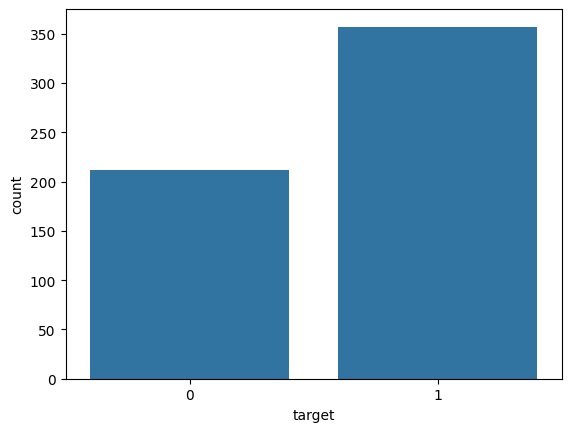

In [25]:
# 종석변수의 빈도수 -- 샘플링 편향정도
sns.countplot(data=df, x='target')

<Axes: >

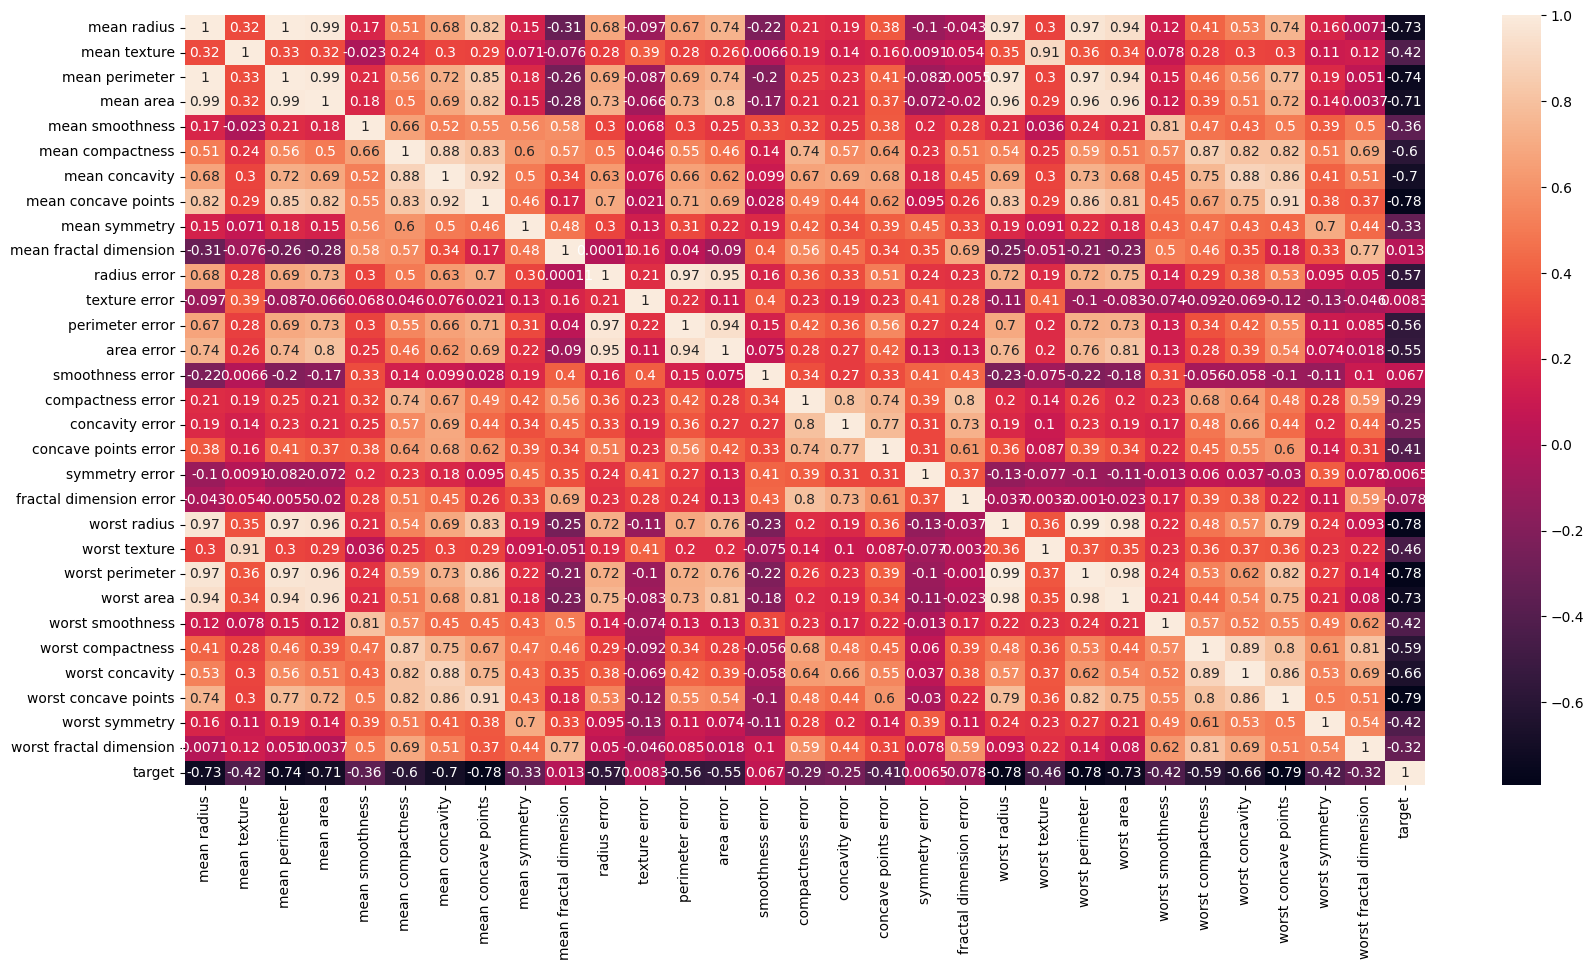

In [26]:
# 상관관계
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
# 다중공선성 - 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline # 자동화를 지원하는 라이브러리
# 데이터 분리
x = df.drop('target',axis=1)
y = df['target']

# 서로다른 스케일링 기법을 순차적으로 적용 - 일반적으로 사용하는 방법이 아님
pipeline = Pipeline([
 ('min_max_scaler', MinMaxScaler()),
 ('std_scaler',StandardScaler())   
])
print(f"x shape: {x.shape} y shape {y.shape}")
# 데이터 분리
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state=42)

x shape: (569, 30) y shape (569,)


In [53]:
# 평가용 라이브러리 설정
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 분류모델에서 model.score(x_test,y_test) --> accuracy_score
# accuracy_score(y_test, preds)

In [54]:
# 평가용 함수
def print_score(clf, x_train, y_train, x_test, y_test, train = True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print('Train Result : \n =================================================')
        print(f'Accuracy score : {accuracy_score(y_train,pred)*100:.2f}%')
        print('-------------------------------------------------------------------')
        print(f'classification_report : \n{clf_report}')
        print('-------------------------------------------------------------------')
        print(f'confusion_matrix : \n{confusion_matrix(y_train,pred)}\n')
    else:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print('Train Result : \n =================================================')
        print(f'Accuracy score : {accuracy_score(y_test,pred)*100:.2f}%')
        print('-------------------------------------------------------------------')
        print(f'classification_report : \n{clf_report}')
        print('-------------------------------------------------------------------')
        print(f'confusion_matrix : \n{confusion_matrix(y_test,pred)}\n')

In [55]:
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)

SVC()

In [56]:
print_score(model,x_train,y_train, x_test, y_test, train = True)
print_score(model,x_train,y_train, x_test, y_test, train = False)

Train Result : 
Accuracy score : 91.78%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    0.955882    0.900000   0.91784    0.927941      0.920857
recall       0.817610    0.977528   0.91784    0.897569      0.917840
f1-score     0.881356    0.937163   0.91784    0.909260      0.916334
support    159.000000  267.000000   0.91784  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[130  29]
 [  6 261]]

Train Result : 
Accuracy score : 92.31%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.956522   0.907216  0.923077    0.931869      0.925490
recall      0.830189   0.977778  0.923077    0.903983      0.923077
f1-score    0.888889   0.941176  0.923077    0.915033      0.921797


In [57]:
model = svm.SVC(kernel='poly')
model.fit(x_train,y_train)
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

Train Result : 
Accuracy score : 90.85%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy  macro avg  weighted avg
precision    0.954545    0.887755  0.908451    0.92115      0.912684
recall       0.792453    0.977528  0.908451    0.88499      0.908451
f1-score     0.865979    0.930481  0.908451    0.89823      0.906407
support    159.000000  267.000000  0.908451  426.00000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[126  33]
 [  6 261]]

Train Result : 
Accuracy score : 91.61%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.955556   0.897959  0.916084    0.926757      0.919306
recall      0.811321   0.977778  0.916084    0.894549      0.916084
f1-score    0.877551   0.936170  0.916084    0.906861      0.914444
suppo

In [58]:
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

Train Result : 
Accuracy score : 96.24%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    0.955414    0.966543  0.962441    0.960978      0.962389
recall       0.943396    0.973783  0.962441    0.958589      0.962441
f1-score     0.949367    0.970149  0.962441    0.959758      0.962393
support    159.000000  267.000000  0.962441  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[150   9]
 [  7 260]]

Train Result : 
Accuracy score : 95.10%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.979167   0.936842  0.951049    0.958004      0.952529
recall      0.886792   0.988889  0.951049    0.937841      0.951049
f1-score    0.930693   0.962162  0.951049    0.946428      0.950499


In [59]:
# 전처리 한 후 성능평가
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [60]:
print('===================== linear kernel svm =======================')
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

===================== linear kernel svm =======================
Train Result : 
Accuracy score : 99.06%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    0.993631    0.988848   0.99061    0.991239      0.990633
recall       0.981132    0.996255   0.99061    0.988693      0.990610
f1-score     0.987342    0.992537   0.99061    0.989940      0.990598
support    159.000000  267.000000   0.99061  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[156   3]
 [  1 266]]

Train Result : 
Accuracy score : 97.90%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.962963   0.988764  0.979021    0.975864      0.979201
recall      0.981132   0.977778  0.979021    0.979455      0.979021
f1-s

In [61]:
print('===================== Polynomial kernel svm =======================')
model = svm.SVC(kernel='poly')
model.fit(x_train,y_train)
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

===================== Polynomial kernel svm =======================
Train Result : 
Accuracy score : 91.55%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.881188  0.915493    0.940594      0.925533
recall       0.773585    1.000000  0.915493    0.886792      0.915493
f1-score     0.872340    0.936842  0.915493    0.904591      0.912768
support    159.000000  267.000000  0.915493  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[123  36]
 [  0 267]]

Train Result : 
Accuracy score : 91.61%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.882353  0.916084    0.941176      0.925956
recall      0.773585   1.000000  0.916084    0.886792      0.916084


In [62]:
print('===================== rbf kernel svm =======================')
model = svm.SVC(kernel='rbf')
model.fit(x_train,y_train)
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

===================== rbf kernel svm =======================
Train Result : 
Accuracy score : 97.89%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    0.980769    0.977778  0.978873    0.979274      0.978894
recall       0.962264    0.988764  0.978873    0.975514      0.978873
f1-score     0.971429    0.983240  0.978873    0.977334      0.978832
support    159.000000  267.000000  0.978873  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[153   6]
 [  3 264]]

Train Result : 
Accuracy score : 97.20%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.962264   0.977778  0.972028    0.970021      0.972028
recall      0.962264   0.977778  0.972028    0.970021      0.972028
f1-scor

In [63]:
print('===================== Sigmoid kernel svm =======================')
model = svm.SVC(kernel='sigmoid')
model.fit(x_train,y_train)
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

===================== Sigmoid kernel svm =======================
Train Result : 
Accuracy score : 96.48%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    0.986486    0.953237  0.964789    0.969862      0.965647
recall       0.918239    0.992509  0.964789    0.955374      0.964789
f1-score     0.951140    0.972477  0.964789    0.961809      0.964513
support    159.000000  267.000000  0.964789  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[146  13]
 [  2 265]]

Train Result : 
Accuracy score : 95.80%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.960784   0.956522  0.958042    0.958653      0.958102
recall      0.924528   0.977778  0.958042    0.951153      0.958042
f1-

In [64]:
# SVM 중에 커널이 linear인 모델이 성능이 우수함
# 머신러닝 중에 성능에 영향을 미치는 가장 큰 요소
# 1. 데이터의 품질과 개수가 많아야 함
    # 1-1 노이즈가 없다 - 결측치나 이상치가 없다
    # 1-2 특성의 분포가 정규분포 형태를 취한다 - 편향이 없다
    # 파생변수를 생성하거나, 상관관계를 보고 두 변수간의 상관관계 높으면 하나를 제거해서 특성이 왜곡되는 현상을 방지
# 2. 적합한 모델을 선정
    # 1번을 고정하고 여러 모델을 평가해서 선정
# 3. 하이퍼 파라미터 튜닝
    # 하나씩 대입하며 찾기
    # grid search cv

In [65]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |
 |  C-Support Vector Classification.
 |
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |
 |  The multiclass support is handled according to a one-vs-one scheme.
 |
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : [0.01,0.1,0.5,1,10,100],
    'gamma' : ['scale','auto'],
    'kernel' : ['rbf', 'poly', 'linear'],
    'degree' : [1,2,3,4,5]
}
grid = GridSearchCV(svm.SVC(),param_grid=param_grid,cv=5, refit=True)
# refit=True 기본값.. 성능이 좋은 parameter를 가지고 다시 전체데이터를 재 학습
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear']})

In [67]:
print(f'best parameters : {grid.best_params_}')
model = grid.best_estimator_
print_score(model,x_train,y_train,x_test,y_test,train=True)
print_score(model,x_train,y_train,x_test,y_test,train=False)

best parameters : {'C': 0.01, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
Train Result : 
Accuracy score : 98.12%
-------------------------------------------------------------------
classification_report : 
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.970909  0.981221    0.985455      0.981767
recall       0.949686    1.000000  0.981221    0.974843      0.981221
f1-score     0.974194    0.985240  0.981221    0.979717      0.981117
support    159.000000  267.000000  0.981221  426.000000    426.000000
-------------------------------------------------------------------
confusion_matrix : 
[[151   8]
 [  0 267]]

Train Result : 
Accuracy score : 95.10%
-------------------------------------------------------------------
classification_report : 
                   0          1  accuracy   macro avg  weighted avg
precision   0.979167   0.936842  0.951049    0.958004      0.952529
recall      0.886792   0.988889  0.951049    0.937841  